<H1> INTRODUCTION </H1>

We want to analyse the data related to the median value of houses in boston using **deep neural networks** . The dataset has been imported from kaggle  and it contains a total of 10 features in addition to the targeted value of median housing value MEDV. 
    
The objectif is to classify our housing dataset based on all the feature to predict what is the category of median value we can get. Either its lower than the overall median of the sampled data or it's in the higher rank.
    
    
This study will help us to provide the best factors that lead to the decision in term of values and before that, to identify what is the best model that can used.

In the current project we will proceed by conducting a simple preliminary EDA of our dataset, folowed by feature engineering. We will follow up with summary training by using train test splits 

We will then apply our deep neural network by using multiple optimisers and different epochs to see how it performs


All the presented and discussed results will be used to formalise our final recomendations

<H2> IMPORTING LIBRARIES </H2>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<H2> DATA </H2>

<p> Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town </p>

<ol>
    
<li>ZN: proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS: proportion of non-retail business acres per town</li>
<li>CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX: nitric oxides concentration (parts per 10 million)</li>
<li>RM: average number of rooms per dwelling</li>
<li>AGE: proportion of owner-occupied units built prior to 1940</li>
<li>DIS: weighted distances to ﬁve Boston employment centers</li>
<li>RAD: index of accessibility to radial highways</li>
<li>TAX: full-value property-tax rate per </li>
<li> PTRATIO: pupil-teacher ratio by town 12. </li>
<li> B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. </li>
<li>LSTAT: percent of lower status of the population</li>
<li>MEDV: Median value of owner-occupied homes in </li>

</ol>

We can see that the input attributes have a mixture of units.

<H2> DATA: IMPORTING DATA </H2>

In [2]:
# os.chdir('data')

In [3]:
sns.set_palette('Set2')

In [4]:
filepath='data/data.csv'

In [5]:
data=pd.read_csv(filepath, sep=',')

<H2> DATA: EDA </H2>

<p> We start by evaluating the general aspects of our data : shape, types of values, statistical values for each column ..) </p>

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
data.shape

(506, 14)

In [10]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<p> We can also know how many binary values resid in the data by calculating the sum on unique values. Columns that had a sum of 2 are binary data. We also know from the description of data that some features are ordinal.
We want also to remove null values to avoid affecting data </p>

In [11]:
df_unique=data.nunique()
df_unique

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [12]:
data.isnull().sum()



CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [13]:
data.dropna(inplace=True)

<p> Now that we know the data a little bit more we want to evaluate it visualy . We made a loop that plot the histogram, boxplot and kde for each feature. We can clearly see the skewness in data, the presence of outliers  </p>

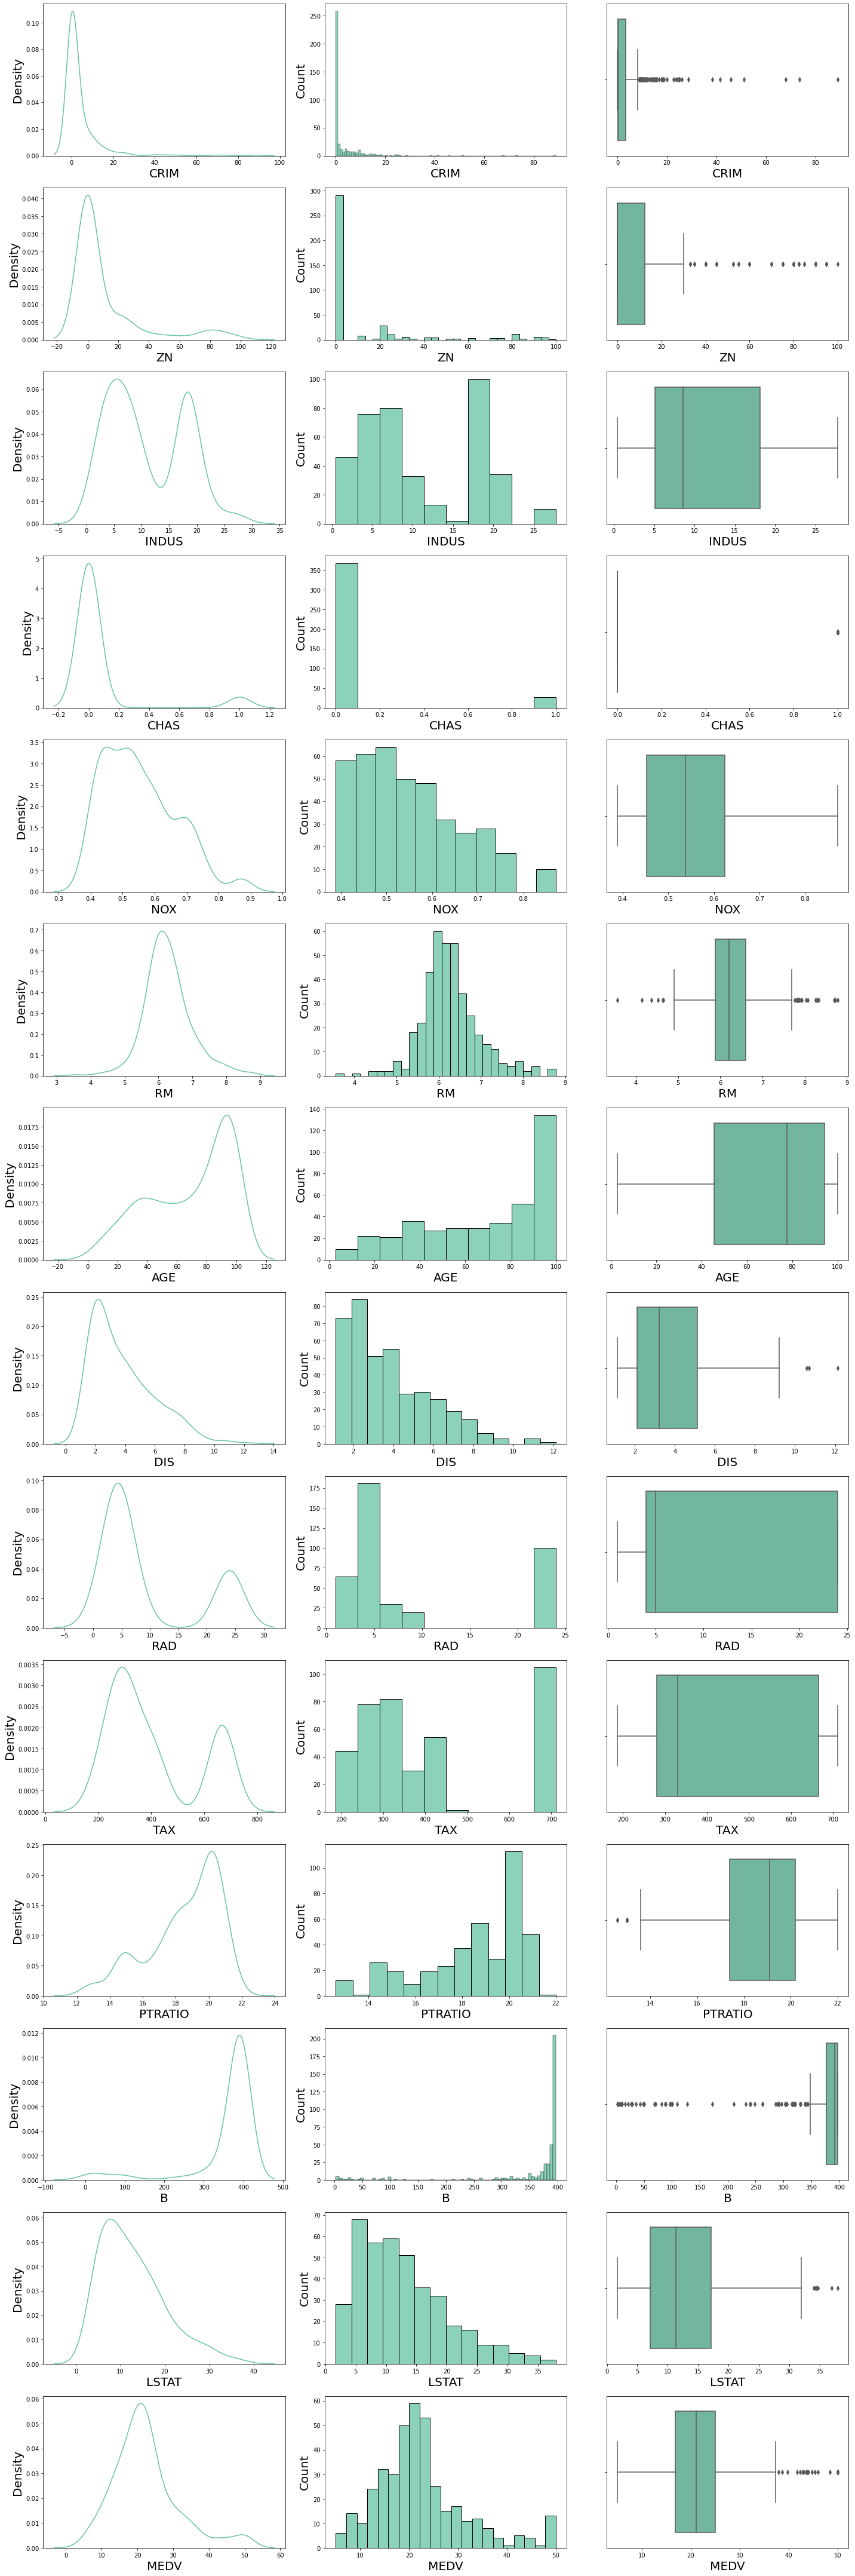

In [14]:
plt.rcParams["axes.labelsize"] = 20

f, ax = plt.subplots(len(data.columns), 3, figsize=(20, 60),gridspec_kw=dict(width_ratios=[1, 1,1]) )



for i,j in zip(range(len(data.columns)) ,data.columns): 
    

    
    sns.kdeplot(data['{}'.format(j)], ax=ax[i,0])
    sns.histplot(data['{}'.format(j)], ax=ax[i,1])
    sns.boxplot(x=data['{}'.format(j)], ax=ax[i,2])

#     except: 
#         sns.kdeplot(data['{}'.format(j)], ax=ax[i,0])
#         sns.histplot(data['{}'.format(j)], ax=ax[i,1])
#         sns.boxplot(x=np.log1p('{}'.format(j)), ax=ax[i,2])        

f.tight_layout()

<p> To further extract informations from the dataset, we proceed by calculating the pearson correlation of each featuer in comparaison with the median value, which is the targeted </p>

<AxesSubplot:xlabel='MEDV', ylabel='index'>

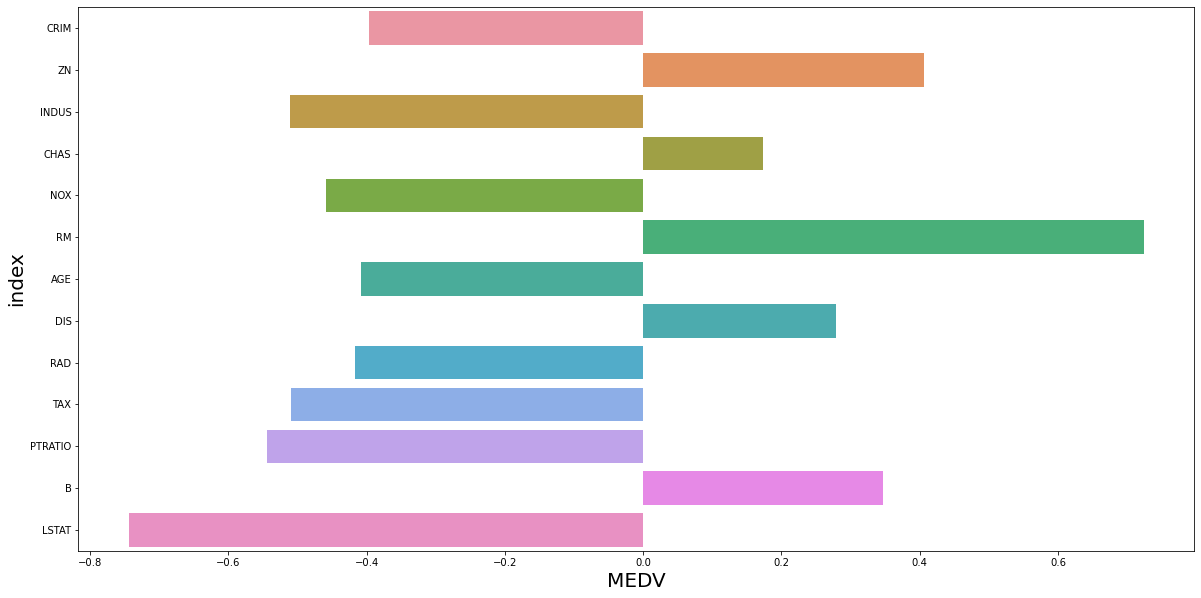

In [15]:
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(20,10))
sns.barplot(x='MEDV',y='index',data=data.corr().loc[['MEDV']].T.reset_index().iloc[:-1])

<H2> DATA: FEATURE ENGINEERING </H2>

<p> We start by transforming our values by using the mix max saller. This will help to make the data range in the same level of values, which is very important for doing correct classification by regression </p>

In [30]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_t=pd.DataFrame(mm.fit_transform(data))
data_t.columns=data.columns

In [31]:
data_t.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,394.0,0.041405,0.103433,0.0,0.000850,0.002951,0.038548,1.0
ZN,394.0,0.114607,0.239541,0.0,0.000000,0.000000,0.125000,1.0
INDUS,394.0,0.386395,0.253239,0.0,0.171188,0.296921,0.646628,1.0
CHAS,394.0,0.068528,0.252971,0.0,0.000000,0.000000,0.000000,1.0
NOX,394.0,0.340696,0.234673,0.0,0.132780,0.309129,0.487552,1.0
RM,394.0,0.520984,0.133739,0.0,0.444194,0.505940,0.583349,1.0
AGE,394.0,0.680049,0.287216,0.0,0.438465,0.770340,0.940783,1.0
DIS,394.0,0.243311,0.190833,0.0,0.089161,0.188198,0.362566,1.0
RAD,394.0,0.365372,0.375367,0.0,0.130435,0.173913,1.000000,1.0
TAX,394.0,0.418762,0.321207,0.0,0.177958,0.272901,0.914122,1.0


<p> We separate the median value : our target, from the features </p>

In [32]:
data_t['MEDV2']=data_t['MEDV'].apply(lambda x: 1 if x < np.median(data_t['MEDV']) else 0)

In [33]:
data_t.drop(columns='MEDV', inplace=True)

In [34]:
y, X = data_t['MEDV2'], data.iloc[:,:-1]

<p> We proceed by importing our needed librarys for modeling and tesitng. We also split the data using the train test split methodology . We used a propostion of 30 pct for test.   <p>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [37]:
normalizer=StandardScaler()

In [38]:
X_train_norm=normalizer.fit_transform(X_train)
X_test_norm=normalizer.transform(X_test)

<H2> CLASSIFIERS </H2>

<p> We proceed by creating our models using keras . We import our sequential, layer creation and optimiser modules  <p>

In [70]:


from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [46]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score

We will use two dense layers , the first one with 10 nodes and the second one with 6. We use Relu as activation method in both layers . Our input shape is of course the number of features we have, which is 13. One final layer will have one sigmoid activation value . This final layer is suitable for our classification since we have a binary classification scheme

For the first step we will use 500 epochs with **SGD** as optimiser. We opted at the start with a learning rate of 0.003.

In [58]:
model_1=Sequential()

model_1.add(Dense(10,input_shape=(13,), activation='relu'))

model_1.add(Dense(6, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(SGD(lr=0.003),"binary_crossentropy", metrics=["BinaryAccuracy"])

run_hist_1=model_1.fit(X_train_norm,y_train, validation_data=(X_test_norm,y_test), epochs=500, shuffle=True)

Epoch 1/500
9/9 [==============================] - 1s 45ms/step - loss: 0.6812 - binary_accuracy: 0.6567 - val_loss: 0.6661 - val_binary_accuracy: 0.6975
Epoch 2/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6677 - binary_accuracy: 0.6522 - val_loss: 0.6639 - val_binary_accuracy: 0.7059
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.6732 - binary_accuracy: 0.6526 - val_loss: 0.6617 - val_binary_accuracy: 0.7059
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6548 - binary_accuracy: 0.7147 - val_loss: 0.6597 - val_binary_accuracy: 0.7143
Epoch 5/500
9/9 [==============================] - 0s 9ms/step - loss: 0.6564 - binary_accuracy: 0.7066 - val_loss: 0.6575 - val_binary_accuracy: 0.7143
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6569 - binary_accuracy: 0.7237 - val_loss: 0.6554 - val_binary_accuracy: 0.7143
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6570 - b

9/9 [==============================] - 0s 30ms/step - loss: 0.4722 - binary_accuracy: 0.8056 - val_loss: 0.4661 - val_binary_accuracy: 0.8235
Epoch 108/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4728 - binary_accuracy: 0.8055 - val_loss: 0.4646 - val_binary_accuracy: 0.8235
Epoch 109/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4833 - binary_accuracy: 0.8024 - val_loss: 0.4632 - val_binary_accuracy: 0.8235
Epoch 110/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4547 - binary_accuracy: 0.8276 - val_loss: 0.4616 - val_binary_accuracy: 0.8235
Epoch 111/500
9/9 [==============================] - 0s 8ms/step - loss: 0.5033 - binary_accuracy: 0.7655 - val_loss: 0.4601 - val_binary_accuracy: 0.8235
Epoch 112/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4453 - binary_accuracy: 0.8369 - val_loss: 0.4587 - val_binary_accuracy: 0.8235
Epoch 113/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4525 - b

Epoch 160/500
9/9 [==============================] - 0s 6ms/step - loss: 0.4057 - binary_accuracy: 0.8102 - val_loss: 0.4032 - val_binary_accuracy: 0.8235
Epoch 161/500
9/9 [==============================] - 0s 6ms/step - loss: 0.3931 - binary_accuracy: 0.8339 - val_loss: 0.4022 - val_binary_accuracy: 0.8235
Epoch 162/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4060 - binary_accuracy: 0.8205 - val_loss: 0.4013 - val_binary_accuracy: 0.8235
Epoch 163/500
9/9 [==============================] - 0s 9ms/step - loss: 0.4155 - binary_accuracy: 0.8297 - val_loss: 0.4003 - val_binary_accuracy: 0.8235
Epoch 164/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3937 - binary_accuracy: 0.8491 - val_loss: 0.3994 - val_binary_accuracy: 0.8235
Epoch 165/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4272 - binary_accuracy: 0.8205 - val_loss: 0.3985 - val_binary_accuracy: 0.8235
Epoch 166/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 213/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3330 - binary_accuracy: 0.8820 - val_loss: 0.3637 - val_binary_accuracy: 0.8487
Epoch 214/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3519 - binary_accuracy: 0.8574 - val_loss: 0.3631 - val_binary_accuracy: 0.8487
Epoch 215/500
9/9 [==============================] - 0s 29ms/step - loss: 0.3396 - binary_accuracy: 0.8629 - val_loss: 0.3626 - val_binary_accuracy: 0.8487
Epoch 216/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3575 - binary_accuracy: 0.8615 - val_loss: 0.3620 - val_binary_accuracy: 0.8487
Epoch 217/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3435 - binary_accuracy: 0.8603 - val_loss: 0.3615 - val_binary_accuracy: 0.8487
Epoch 218/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3648 - binary_accuracy: 0.8615 - val_loss: 0.3609 - val_binary_accuracy: 0.8487
Epoch 219/500
9/9 [==============================] - 0s 8ms/step - lo

Epoch 266/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3523 - binary_accuracy: 0.8383 - val_loss: 0.3375 - val_binary_accuracy: 0.8403
Epoch 267/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3583 - binary_accuracy: 0.8455 - val_loss: 0.3371 - val_binary_accuracy: 0.8403
Epoch 268/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3309 - binary_accuracy: 0.8500 - val_loss: 0.3368 - val_binary_accuracy: 0.8403
Epoch 269/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3265 - binary_accuracy: 0.8673 - val_loss: 0.3363 - val_binary_accuracy: 0.8403
Epoch 270/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2988 - binary_accuracy: 0.8934 - val_loss: 0.3359 - val_binary_accuracy: 0.8403
Epoch 271/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3506 - binary_accuracy: 0.8573 - val_loss: 0.3355 - val_binary_accuracy: 0.8487
Epoch 272/500
9/9 [==============================] - 0s 9ms/step - los

Epoch 319/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2878 - binary_accuracy: 0.8833 - val_loss: 0.3184 - val_binary_accuracy: 0.8487
Epoch 320/500
9/9 [==============================] - 0s 6ms/step - loss: 0.3026 - binary_accuracy: 0.8963 - val_loss: 0.3181 - val_binary_accuracy: 0.8487
Epoch 321/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2857 - binary_accuracy: 0.8937 - val_loss: 0.3178 - val_binary_accuracy: 0.8487
Epoch 322/500
9/9 [==============================] - ETA: 0s - loss: 0.3279 - binary_accuracy: 0.875 - 0s 6ms/step - loss: 0.3093 - binary_accuracy: 0.8718 - val_loss: 0.3175 - val_binary_accuracy: 0.8487
Epoch 323/500
9/9 [==============================] - 0s 26ms/step - loss: 0.3100 - binary_accuracy: 0.8746 - val_loss: 0.3172 - val_binary_accuracy: 0.8487
Epoch 324/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2710 - binary_accuracy: 0.9099 - val_loss: 0.3169 - val_binary_accuracy: 0.8487
Epoch 325/500
9/9 [

Epoch 424/500
9/9 [==============================] - 0s 7ms/step - loss: 0.2623 - binary_accuracy: 0.8898 - val_loss: 0.2936 - val_binary_accuracy: 0.8655
Epoch 425/500
9/9 [==============================] - 0s 7ms/step - loss: 0.3079 - binary_accuracy: 0.8791 - val_loss: 0.2934 - val_binary_accuracy: 0.8655
Epoch 426/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2548 - binary_accuracy: 0.8964 - val_loss: 0.2933 - val_binary_accuracy: 0.8655
Epoch 427/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2825 - binary_accuracy: 0.8779 - val_loss: 0.2930 - val_binary_accuracy: 0.8655
Epoch 428/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2487 - binary_accuracy: 0.9022 - val_loss: 0.2928 - val_binary_accuracy: 0.8655
Epoch 429/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2664 - binary_accuracy: 0.8930 - val_loss: 0.2926 - val_binary_accuracy: 0.8655
Epoch 430/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 477/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2730 - binary_accuracy: 0.8890 - val_loss: 0.2859 - val_binary_accuracy: 0.8655
Epoch 478/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2804 - binary_accuracy: 0.8814 - val_loss: 0.2857 - val_binary_accuracy: 0.8739
Epoch 479/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2475 - binary_accuracy: 0.9178 - val_loss: 0.2857 - val_binary_accuracy: 0.8824
Epoch 480/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2771 - binary_accuracy: 0.8767 - val_loss: 0.2856 - val_binary_accuracy: 0.8824
Epoch 481/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2393 - binary_accuracy: 0.9117 - val_loss: 0.2855 - val_binary_accuracy: 0.8824
Epoch 482/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2430 - binary_accuracy: 0.9087 - val_loss: 0.2854 - val_binary_accuracy: 0.8824
Epoch 483/500
9/9 [==============================] - 0s 7ms/step - los

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


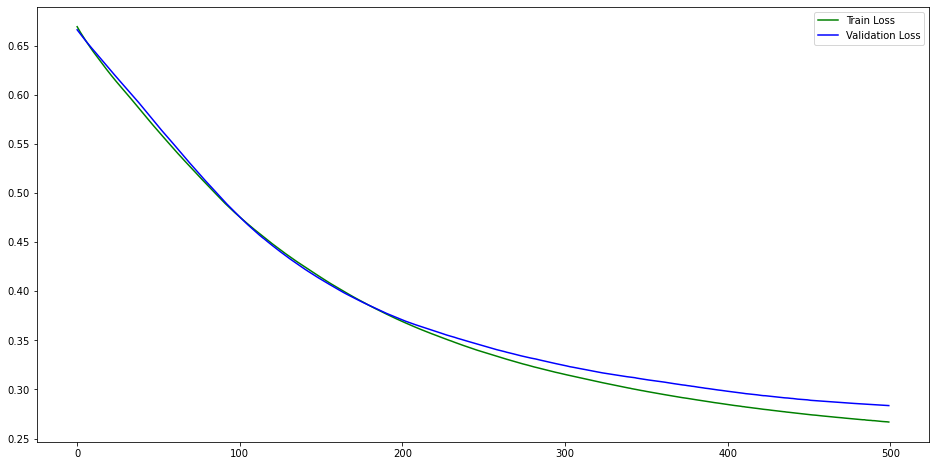

In [59]:
y_pred_class_n1=model_1.predict_classes(X_test_norm)

y_pred_prob_n1=model_1.predict(X_test_norm)
plt.figure(figsize=(16,8))
plt.plot(run_hist_1.history["loss"],'green', label="Train Loss")
plt.plot(run_hist_1.history["val_loss"],'blue', label="Validation Loss")
plt.legend()
plt.show()

accuracy is 0.8823529411764706
roc-auc is 0.9582386363636364


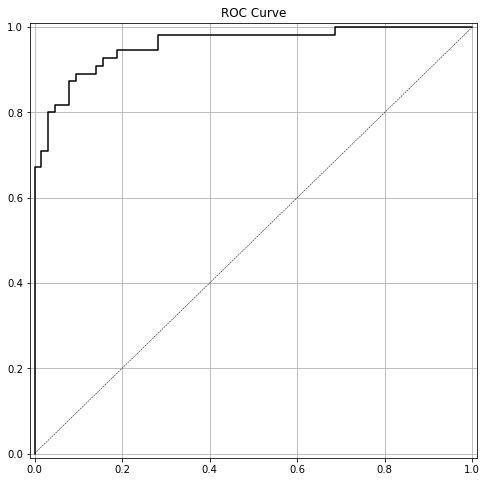

In [60]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

print('accuracy is {}'.format(accuracy_score(y_test,y_pred_class_n1)))
print('roc-auc is {}'.format(roc_auc_score(y_test,y_pred_prob_n1)))
plot_roc(y_test, y_pred_prob_n1, 'DNN_EPOCH_500_SGD')

We notice that we have little overfitting . We can clearly see it on the train loss- validation loss curves.  The blue lines is a little bith higher than the green line. This indicate that the model does a better job on the testing data without too much of a margin with the training 

We now will use **adam** optimiser and the same epochs 500 and learning rate of 0.003

In [62]:
model_2=Sequential()

model_2.add(Dense(10,input_shape=(13,), activation='relu'))

model_2.add(Dense(6, activation='relu'))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(Adam(lr=0.003),"binary_crossentropy", metrics=["BinaryAccuracy"])

run_hist_2=model_2.fit(X_train_norm,y_train, validation_data=(X_test_norm,y_test), epochs=500, shuffle=True)

Epoch 1/500
9/9 [==============================] - 1s 36ms/step - loss: 0.6402 - binary_accuracy: 0.5165 - val_loss: 0.5892 - val_binary_accuracy: 0.5546
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6082 - binary_accuracy: 0.5250 - val_loss: 0.5518 - val_binary_accuracy: 0.6555
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 0.5529 - binary_accuracy: 0.6268 - val_loss: 0.5244 - val_binary_accuracy: 0.6975
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 0.5375 - binary_accuracy: 0.6847 - val_loss: 0.5027 - val_binary_accuracy: 0.7815
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 0.5417 - binary_accuracy: 0.7513 - val_loss: 0.4858 - val_binary_accuracy: 0.8403
Epoch 6/500
9/9 [==============================] - 0s 9ms/step - loss: 0.4982 - binary_accuracy: 0.8327 - val_loss: 0.4710 - val_binary_accuracy: 0.8739
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4869 - b

9/9 [==============================] - 0s 7ms/step - loss: 0.1097 - binary_accuracy: 0.9474 - val_loss: 0.2502 - val_binary_accuracy: 0.8992
Epoch 108/500
9/9 [==============================] - 0s 7ms/step - loss: 0.1254 - binary_accuracy: 0.9351 - val_loss: 0.2432 - val_binary_accuracy: 0.8992
Epoch 109/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1271 - binary_accuracy: 0.9453 - val_loss: 0.2429 - val_binary_accuracy: 0.8992
Epoch 110/500
9/9 [==============================] - 0s 10ms/step - loss: 0.1177 - binary_accuracy: 0.9500 - val_loss: 0.2461 - val_binary_accuracy: 0.8908
Epoch 111/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1192 - binary_accuracy: 0.9552 - val_loss: 0.2466 - val_binary_accuracy: 0.8908
Epoch 112/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1340 - binary_accuracy: 0.9441 - val_loss: 0.2409 - val_binary_accuracy: 0.8992
Epoch 113/500
9/9 [==============================] - 0s 9ms/step - loss: 0.1404 - b

Epoch 160/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0759 - binary_accuracy: 0.9796 - val_loss: 0.2380 - val_binary_accuracy: 0.8908
Epoch 161/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0839 - binary_accuracy: 0.9651 - val_loss: 0.2405 - val_binary_accuracy: 0.8908
Epoch 162/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0733 - binary_accuracy: 0.9734 - val_loss: 0.2390 - val_binary_accuracy: 0.8908
Epoch 163/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0845 - binary_accuracy: 0.9681 - val_loss: 0.2396 - val_binary_accuracy: 0.8908
Epoch 164/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0942 - binary_accuracy: 0.9685 - val_loss: 0.2419 - val_binary_accuracy: 0.8908
Epoch 165/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0798 - binary_accuracy: 0.9695 - val_loss: 0.2413 - val_binary_accuracy: 0.8908
Epoch 166/500
9/9 [==============================] - 0s 9ms/step - los

Epoch 213/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0687 - binary_accuracy: 0.9799 - val_loss: 0.2905 - val_binary_accuracy: 0.8739
Epoch 214/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0577 - binary_accuracy: 0.9848 - val_loss: 0.2904 - val_binary_accuracy: 0.8739
Epoch 215/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0659 - binary_accuracy: 0.9764 - val_loss: 0.3015 - val_binary_accuracy: 0.8739
Epoch 216/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0663 - binary_accuracy: 0.9857 - val_loss: 0.2873 - val_binary_accuracy: 0.8739
Epoch 217/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0564 - binary_accuracy: 0.9851 - val_loss: 0.2895 - val_binary_accuracy: 0.8739
Epoch 218/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0573 - binary_accuracy: 0.9802 - val_loss: 0.2985 - val_binary_accuracy: 0.8824
Epoch 219/500
9/9 [==============================] - 0s 9ms/step - los

Epoch 266/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0562 - binary_accuracy: 0.9802 - val_loss: 0.3683 - val_binary_accuracy: 0.8655
Epoch 267/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0615 - binary_accuracy: 0.9711 - val_loss: 0.3766 - val_binary_accuracy: 0.8655
Epoch 268/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0484 - binary_accuracy: 0.9883 - val_loss: 0.3751 - val_binary_accuracy: 0.8655
Epoch 269/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0512 - binary_accuracy: 0.9798 - val_loss: 0.3799 - val_binary_accuracy: 0.8655
Epoch 270/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0762 - binary_accuracy: 0.9803 - val_loss: 0.3808 - val_binary_accuracy: 0.8739
Epoch 271/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0534 - binary_accuracy: 0.9804 - val_loss: 0.3810 - val_binary_accuracy: 0.8655
Epoch 272/500
9/9 [==============================] - 0s 9ms/step - los

Epoch 319/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0377 - binary_accuracy: 0.9867 - val_loss: 0.4622 - val_binary_accuracy: 0.8655
Epoch 320/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0335 - binary_accuracy: 0.9894 - val_loss: 0.4638 - val_binary_accuracy: 0.8655
Epoch 321/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0651 - binary_accuracy: 0.9709 - val_loss: 0.4632 - val_binary_accuracy: 0.8655
Epoch 322/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0501 - binary_accuracy: 0.9839 - val_loss: 0.4621 - val_binary_accuracy: 0.8655
Epoch 323/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0651 - binary_accuracy: 0.9803 - val_loss: 0.4644 - val_binary_accuracy: 0.8655
Epoch 324/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0470 - binary_accuracy: 0.9732 - val_loss: 0.4658 - val_binary_accuracy: 0.8655
Epoch 325/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 372/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0604 - binary_accuracy: 0.9850 - val_loss: 0.5368 - val_binary_accuracy: 0.8824
Epoch 373/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0301 - binary_accuracy: 0.9911 - val_loss: 0.5391 - val_binary_accuracy: 0.8824
Epoch 374/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0440 - binary_accuracy: 0.9801 - val_loss: 0.5391 - val_binary_accuracy: 0.8824
Epoch 375/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0586 - binary_accuracy: 0.9841 - val_loss: 0.5421 - val_binary_accuracy: 0.8824
Epoch 376/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0261 - binary_accuracy: 0.9915 - val_loss: 0.5419 - val_binary_accuracy: 0.8739
Epoch 377/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0397 - binary_accuracy: 0.9867 - val_loss: 0.5426 - val_binary_accuracy: 0.8824
Epoch 378/500
9/9 [==============================] - 0s 9ms/step - los

Epoch 425/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0479 - binary_accuracy: 0.9843 - val_loss: 0.6036 - val_binary_accuracy: 0.8739
Epoch 426/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0565 - binary_accuracy: 0.9759 - val_loss: 0.6017 - val_binary_accuracy: 0.8739
Epoch 427/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0273 - binary_accuracy: 0.9950 - val_loss: 0.6042 - val_binary_accuracy: 0.8739
Epoch 428/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0415 - binary_accuracy: 0.9885 - val_loss: 0.6079 - val_binary_accuracy: 0.8655
Epoch 429/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0426 - binary_accuracy: 0.9821 - val_loss: 0.6122 - val_binary_accuracy: 0.8739
Epoch 430/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0215 - binary_accuracy: 0.9897 - val_loss: 0.6149 - val_binary_accuracy: 0.8739
Epoch 431/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 478/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0554 - binary_accuracy: 0.9826 - val_loss: 0.6809 - val_binary_accuracy: 0.8739
Epoch 479/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0435 - binary_accuracy: 0.9870 - val_loss: 0.6806 - val_binary_accuracy: 0.8655
Epoch 480/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0260 - binary_accuracy: 0.9915 - val_loss: 0.6782 - val_binary_accuracy: 0.8655
Epoch 481/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0468 - binary_accuracy: 0.9820 - val_loss: 0.6789 - val_binary_accuracy: 0.8655
Epoch 482/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0291 - binary_accuracy: 0.9896 - val_loss: 0.6798 - val_binary_accuracy: 0.8655
Epoch 483/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0231 - binary_accuracy: 0.9928 - val_loss: 0.6866 - val_binary_accuracy: 0.8739
Epoch 484/500
9/9 [==============================] - 0s 9ms/step - los

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


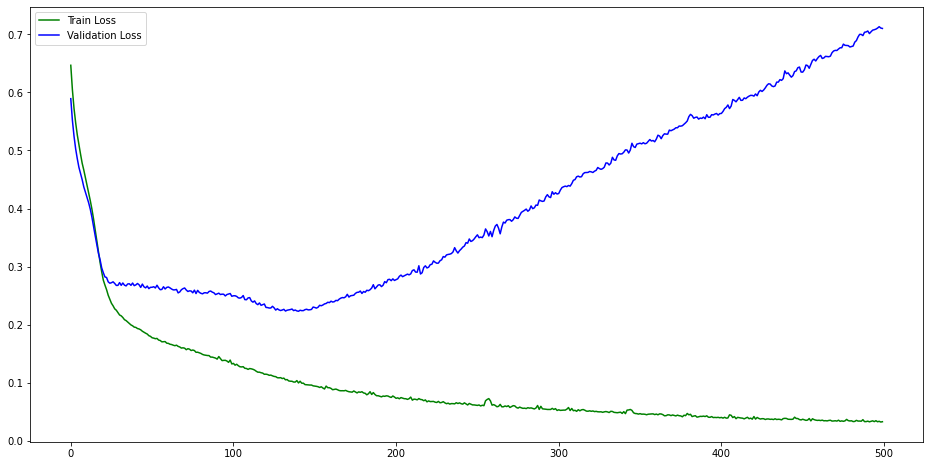

In [66]:
y_pred_class_n2=model_2.predict_classes(X_test_norm)

y_pred_prob_n2=model_2.predict(X_test_norm)
plt.figure(figsize=(16,8))
plt.plot(run_hist_2.history["loss"],'green', label="Train Loss")
plt.plot(run_hist_2.history["val_loss"],'blue', label="Validation Loss")
plt.legend()
plt.show()

accuracy is 0.865546218487395
roc-auc is 0.9505681818181818


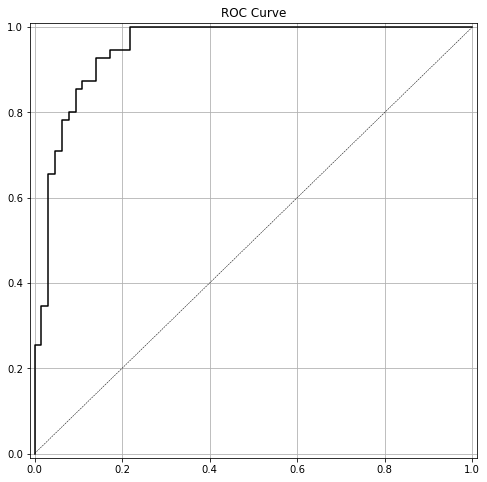

In [65]:

print('accuracy is {}'.format(accuracy_score(y_test,y_pred_class_n2)))
print('roc-auc is {}'.format(roc_auc_score(y_test,y_pred_prob_n2)))
plot_roc(y_test, y_pred_prob_n2, 'DNN_EPOCH_500_adam')

The difference is marginal between SGS and adam. We have an accuracy of 0.86 for adam and 0.88 for SGD but looking at the loss curves, the training loss increased a lot after the 150 th training mark. This big difference is indicatif of extreme overfitting probably 


Lets now use **RMSPROP** with the same of other parameters

In [67]:
model_3=Sequential()

model_3.add(Dense(10,input_shape=(13,), activation='relu'))

model_3.add(Dense(6, activation='relu'))

model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(RMSprop(lr=0.003),"binary_crossentropy", metrics=["BinaryAccuracy"])

run_hist_3=model_3.fit(X_train_norm,y_train, validation_data=(X_test_norm,y_test), epochs=500, shuffle=True)

Epoch 1/500
9/9 [==============================] - 1s 37ms/step - loss: 0.7643 - binary_accuracy: 0.6248 - val_loss: 0.6044 - val_binary_accuracy: 0.7311
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.5674 - binary_accuracy: 0.7744 - val_loss: 0.5248 - val_binary_accuracy: 0.8403
Epoch 3/500
9/9 [==============================] - 0s 9ms/step - loss: 0.4972 - binary_accuracy: 0.8272 - val_loss: 0.4781 - val_binary_accuracy: 0.8403
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4506 - binary_accuracy: 0.8512 - val_loss: 0.4430 - val_binary_accuracy: 0.8403
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4265 - binary_accuracy: 0.8517 - val_loss: 0.4181 - val_binary_accuracy: 0.8487
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 0.4160 - binary_accuracy: 0.8408 - val_loss: 0.3946 - val_binary_accuracy: 0.8571
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 0.3910 - b

9/9 [==============================] - 0s 8ms/step - loss: 0.1490 - binary_accuracy: 0.9333 - val_loss: 0.3097 - val_binary_accuracy: 0.8992
Epoch 108/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1279 - binary_accuracy: 0.9618 - val_loss: 0.3212 - val_binary_accuracy: 0.8908
Epoch 109/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1242 - binary_accuracy: 0.9590 - val_loss: 0.3196 - val_binary_accuracy: 0.8908
Epoch 110/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1221 - binary_accuracy: 0.9486 - val_loss: 0.3199 - val_binary_accuracy: 0.8908
Epoch 111/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1381 - binary_accuracy: 0.9607 - val_loss: 0.3263 - val_binary_accuracy: 0.8908
Epoch 112/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1156 - binary_accuracy: 0.9606 - val_loss: 0.3210 - val_binary_accuracy: 0.8908
Epoch 113/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1166 - bi

Epoch 160/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0999 - binary_accuracy: 0.9679 - val_loss: 0.3289 - val_binary_accuracy: 0.8992
Epoch 161/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0889 - binary_accuracy: 0.9724 - val_loss: 0.3366 - val_binary_accuracy: 0.8908
Epoch 162/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0908 - binary_accuracy: 0.9593 - val_loss: 0.3094 - val_binary_accuracy: 0.8992
Epoch 163/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1209 - binary_accuracy: 0.9533 - val_loss: 0.3153 - val_binary_accuracy: 0.8992
Epoch 164/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0888 - binary_accuracy: 0.9779 - val_loss: 0.3220 - val_binary_accuracy: 0.8992
Epoch 165/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0911 - binary_accuracy: 0.9662 - val_loss: 0.3308 - val_binary_accuracy: 0.8824
Epoch 166/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 213/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0933 - binary_accuracy: 0.9615 - val_loss: 0.3375 - val_binary_accuracy: 0.8992
Epoch 214/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0602 - binary_accuracy: 0.9871 - val_loss: 0.3470 - val_binary_accuracy: 0.8992
Epoch 215/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0767 - binary_accuracy: 0.9748 - val_loss: 0.3396 - val_binary_accuracy: 0.8992
Epoch 216/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0713 - binary_accuracy: 0.9685 - val_loss: 0.3437 - val_binary_accuracy: 0.8992
Epoch 217/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0815 - binary_accuracy: 0.9521 - val_loss: 0.3483 - val_binary_accuracy: 0.8908
Epoch 218/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0861 - binary_accuracy: 0.9602 - val_loss: 0.3446 - val_binary_accuracy: 0.8992
Epoch 219/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 266/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0809 - binary_accuracy: 0.9582 - val_loss: 0.3871 - val_binary_accuracy: 0.9076
Epoch 267/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0682 - binary_accuracy: 0.9740 - val_loss: 0.3902 - val_binary_accuracy: 0.9076
Epoch 268/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0735 - binary_accuracy: 0.9776 - val_loss: 0.3799 - val_binary_accuracy: 0.8908
Epoch 269/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0557 - binary_accuracy: 0.9735 - val_loss: 0.3836 - val_binary_accuracy: 0.9076
Epoch 270/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0662 - binary_accuracy: 0.9714 - val_loss: 0.3876 - val_binary_accuracy: 0.8992
Epoch 271/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0638 - binary_accuracy: 0.9660 - val_loss: 0.3799 - val_binary_accuracy: 0.8992
Epoch 272/500
9/9 [==============================] - 0s 6ms/step - los

Epoch 319/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0625 - binary_accuracy: 0.9791 - val_loss: 0.4488 - val_binary_accuracy: 0.8992
Epoch 320/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0381 - binary_accuracy: 0.9918 - val_loss: 0.4416 - val_binary_accuracy: 0.9076
Epoch 321/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0536 - binary_accuracy: 0.9780 - val_loss: 0.4454 - val_binary_accuracy: 0.8992
Epoch 322/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0593 - binary_accuracy: 0.9860 - val_loss: 0.4534 - val_binary_accuracy: 0.8992
Epoch 323/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0658 - binary_accuracy: 0.9687 - val_loss: 0.4460 - val_binary_accuracy: 0.9076
Epoch 324/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0463 - binary_accuracy: 0.9797 - val_loss: 0.4404 - val_binary_accuracy: 0.9076
Epoch 325/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 372/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0459 - binary_accuracy: 0.9844 - val_loss: 0.4924 - val_binary_accuracy: 0.8992
Epoch 373/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0387 - binary_accuracy: 0.9869 - val_loss: 0.4970 - val_binary_accuracy: 0.8992
Epoch 374/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0550 - binary_accuracy: 0.9703 - val_loss: 0.4878 - val_binary_accuracy: 0.8992
Epoch 375/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0571 - binary_accuracy: 0.9740 - val_loss: 0.4967 - val_binary_accuracy: 0.8992
Epoch 376/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0439 - binary_accuracy: 0.9858 - val_loss: 0.4856 - val_binary_accuracy: 0.8992
Epoch 377/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0516 - binary_accuracy: 0.9800 - val_loss: 0.4905 - val_binary_accuracy: 0.9160
Epoch 378/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 425/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0372 - binary_accuracy: 0.9865 - val_loss: 0.5453 - val_binary_accuracy: 0.8908
Epoch 426/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0488 - binary_accuracy: 0.9780 - val_loss: 0.5330 - val_binary_accuracy: 0.9076
Epoch 427/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0424 - binary_accuracy: 0.9815 - val_loss: 0.5733 - val_binary_accuracy: 0.8992
Epoch 428/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0419 - binary_accuracy: 0.9770 - val_loss: 0.5687 - val_binary_accuracy: 0.8992
Epoch 429/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0478 - binary_accuracy: 0.9816 - val_loss: 0.5530 - val_binary_accuracy: 0.9076
Epoch 430/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0362 - binary_accuracy: 0.9817 - val_loss: 0.5539 - val_binary_accuracy: 0.8908
Epoch 431/500
9/9 [==============================] - 0s 9ms/step - los

Epoch 478/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0414 - binary_accuracy: 0.9838 - val_loss: 0.6143 - val_binary_accuracy: 0.8824
Epoch 479/500
9/9 [==============================] - 0s 8ms/step - loss: 0.0288 - binary_accuracy: 0.9957 - val_loss: 0.5935 - val_binary_accuracy: 0.9160
Epoch 480/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0420 - binary_accuracy: 0.9807 - val_loss: 0.6169 - val_binary_accuracy: 0.8824
Epoch 481/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0426 - binary_accuracy: 0.9784 - val_loss: 0.6028 - val_binary_accuracy: 0.8908
Epoch 482/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0364 - binary_accuracy: 0.9878 - val_loss: 0.6027 - val_binary_accuracy: 0.9160
Epoch 483/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0405 - binary_accuracy: 0.9735 - val_loss: 0.6087 - val_binary_accuracy: 0.9160
Epoch 484/500
9/9 [==============================] - 0s 9ms/step - lo

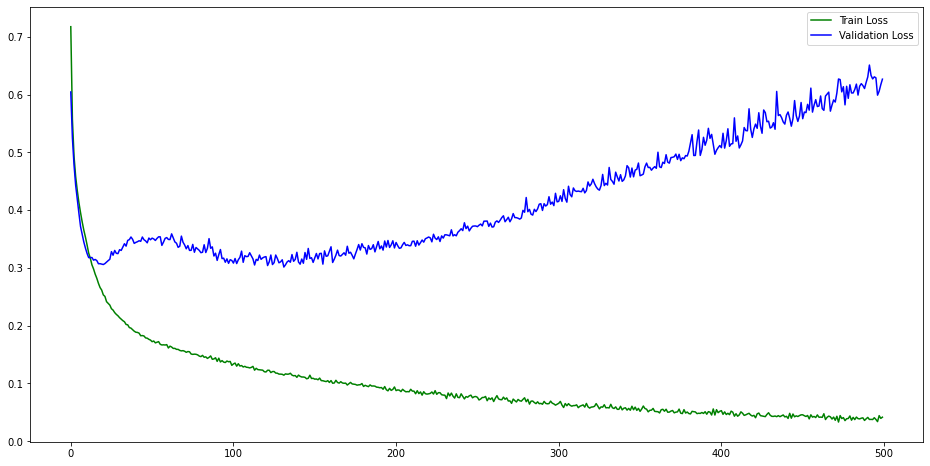

In [68]:
y_pred_class_n3=model_3.predict_classes(X_test_norm)

y_pred_prob_n3=model_3.predict(X_test_norm)
plt.figure(figsize=(16,8))
plt.plot(run_hist_3.history["loss"],'green', label="Train Loss")
plt.plot(run_hist_3.history["val_loss"],'blue', label="Validation Loss")
plt.legend()
plt.show()

accuracy is 0.8823529411764706
roc-auc is 0.9573863636363636


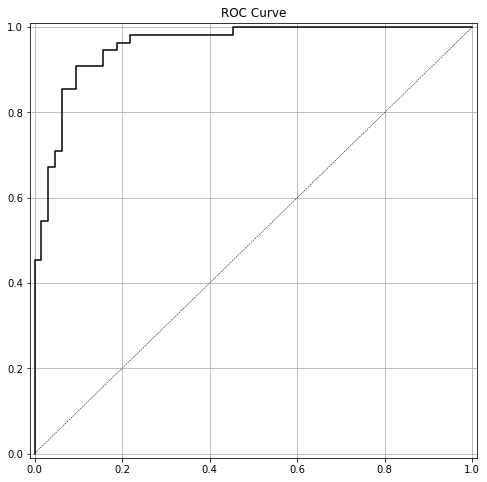

In [69]:

print('accuracy is {}'.format(accuracy_score(y_test,y_pred_class_n3)))
print('roc-auc is {}'.format(roc_auc_score(y_test,y_pred_prob_n3)))
plot_roc(y_test, y_pred_prob_n3, 'DNN_EPOCH_500_rmsprop')

Again, our accuracy seems to be high , almost the same as for SGD but we notice a big difference between the training loss and validation loss. This is indicatif of overfitting

Lets now try with **adagrad**

In [72]:
model_4=Sequential()

model_4.add(Dense(10,input_shape=(13,), activation='relu'))

model_4.add(Dense(6, activation='relu'))

model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(Adagrad(lr=0.01),"binary_crossentropy", metrics=["BinaryAccuracy"])

run_hist_4=model_4.fit(X_train_norm,y_train, validation_data=(X_test_norm,y_test), epochs=500, shuffle=True)

Epoch 1/500
9/9 [==============================] - 1s 26ms/step - loss: 0.9191 - binary_accuracy: 0.4523 - val_loss: 0.7674 - val_binary_accuracy: 0.4874
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.8219 - binary_accuracy: 0.4856 - val_loss: 0.7234 - val_binary_accuracy: 0.4622
Epoch 3/500
9/9 [==============================] - 0s 9ms/step - loss: 0.7618 - binary_accuracy: 0.5055 - val_loss: 0.6941 - val_binary_accuracy: 0.4958
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 0.7123 - binary_accuracy: 0.5184 - val_loss: 0.6707 - val_binary_accuracy: 0.5042
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6865 - binary_accuracy: 0.5268 - val_loss: 0.6523 - val_binary_accuracy: 0.5126
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 0.6599 - binary_accuracy: 0.5296 - val_loss: 0.6364 - val_binary_accuracy: 0.5126
Epoch 7/500
9/9 [==============================] - 0s 9ms/step - loss: 0.6308 - b

9/9 [==============================] - 0s 8ms/step - loss: 0.2858 - binary_accuracy: 0.8639 - val_loss: 0.3612 - val_binary_accuracy: 0.8571
Epoch 108/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2956 - binary_accuracy: 0.8574 - val_loss: 0.3613 - val_binary_accuracy: 0.8571
Epoch 109/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2711 - binary_accuracy: 0.8822 - val_loss: 0.3611 - val_binary_accuracy: 0.8571
Epoch 110/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2898 - binary_accuracy: 0.8614 - val_loss: 0.3609 - val_binary_accuracy: 0.8571
Epoch 111/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2805 - binary_accuracy: 0.8629 - val_loss: 0.3605 - val_binary_accuracy: 0.8571
Epoch 112/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2747 - binary_accuracy: 0.8770 - val_loss: 0.3608 - val_binary_accuracy: 0.8571
Epoch 113/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2858 - bi

Epoch 212/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2150 - binary_accuracy: 0.9005 - val_loss: 0.3577 - val_binary_accuracy: 0.8571
Epoch 213/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2761 - binary_accuracy: 0.8644 - val_loss: 0.3577 - val_binary_accuracy: 0.8571
Epoch 214/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2604 - binary_accuracy: 0.8611 - val_loss: 0.3573 - val_binary_accuracy: 0.8571
Epoch 215/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2456 - binary_accuracy: 0.8703 - val_loss: 0.3572 - val_binary_accuracy: 0.8571
Epoch 216/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2648 - binary_accuracy: 0.8650 - val_loss: 0.3573 - val_binary_accuracy: 0.8571
Epoch 217/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2649 - binary_accuracy: 0.8731 - val_loss: 0.3573 - val_binary_accuracy: 0.8571
Epoch 218/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 265/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2264 - binary_accuracy: 0.8964 - val_loss: 0.3562 - val_binary_accuracy: 0.8487
Epoch 266/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2233 - binary_accuracy: 0.8996 - val_loss: 0.3562 - val_binary_accuracy: 0.8487
Epoch 267/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2039 - binary_accuracy: 0.9020 - val_loss: 0.3564 - val_binary_accuracy: 0.8487
Epoch 268/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2433 - binary_accuracy: 0.8808 - val_loss: 0.3564 - val_binary_accuracy: 0.8487
Epoch 269/500
9/9 [==============================] - 0s 9ms/step - loss: 0.2130 - binary_accuracy: 0.9014 - val_loss: 0.3564 - val_binary_accuracy: 0.8487
Epoch 270/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2417 - binary_accuracy: 0.8789 - val_loss: 0.3568 - val_binary_accuracy: 0.8487
Epoch 271/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 318/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2191 - binary_accuracy: 0.8866 - val_loss: 0.3553 - val_binary_accuracy: 0.8403
Epoch 319/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2245 - binary_accuracy: 0.8958 - val_loss: 0.3552 - val_binary_accuracy: 0.8403
Epoch 320/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2405 - binary_accuracy: 0.8798 - val_loss: 0.3550 - val_binary_accuracy: 0.8403
Epoch 321/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2188 - binary_accuracy: 0.8903 - val_loss: 0.3550 - val_binary_accuracy: 0.8403
Epoch 322/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2198 - binary_accuracy: 0.9028 - val_loss: 0.3552 - val_binary_accuracy: 0.8403
Epoch 323/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2251 - binary_accuracy: 0.8873 - val_loss: 0.3551 - val_binary_accuracy: 0.8403
Epoch 324/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 371/500
9/9 [==============================] - 0s 7ms/step - loss: 0.1946 - binary_accuracy: 0.9153 - val_loss: 0.3524 - val_binary_accuracy: 0.8403
Epoch 372/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2178 - binary_accuracy: 0.8972 - val_loss: 0.3524 - val_binary_accuracy: 0.8403
Epoch 373/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2287 - binary_accuracy: 0.8867 - val_loss: 0.3525 - val_binary_accuracy: 0.8403
Epoch 374/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2103 - binary_accuracy: 0.8968 - val_loss: 0.3525 - val_binary_accuracy: 0.8403
Epoch 375/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2159 - binary_accuracy: 0.8913 - val_loss: 0.3523 - val_binary_accuracy: 0.8403
Epoch 376/500
9/9 [==============================] - 0s 6ms/step - loss: 0.2538 - binary_accuracy: 0.8661 - val_loss: 0.3521 - val_binary_accuracy: 0.8403
Epoch 377/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 424/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2254 - binary_accuracy: 0.8856 - val_loss: 0.3499 - val_binary_accuracy: 0.8403
Epoch 425/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1951 - binary_accuracy: 0.9061 - val_loss: 0.3500 - val_binary_accuracy: 0.8403
Epoch 426/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2206 - binary_accuracy: 0.8949 - val_loss: 0.3498 - val_binary_accuracy: 0.8403
Epoch 427/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2084 - binary_accuracy: 0.9012 - val_loss: 0.3498 - val_binary_accuracy: 0.8403
Epoch 428/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2114 - binary_accuracy: 0.8944 - val_loss: 0.3498 - val_binary_accuracy: 0.8403
Epoch 429/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2590 - binary_accuracy: 0.8598 - val_loss: 0.3499 - val_binary_accuracy: 0.8403
Epoch 430/500
9/9 [==============================] - 0s 8ms/step - los

Epoch 477/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1983 - binary_accuracy: 0.9056 - val_loss: 0.3475 - val_binary_accuracy: 0.8487
Epoch 478/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2083 - binary_accuracy: 0.8949 - val_loss: 0.3474 - val_binary_accuracy: 0.8487
Epoch 479/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2121 - binary_accuracy: 0.9080 - val_loss: 0.3473 - val_binary_accuracy: 0.8487
Epoch 480/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2112 - binary_accuracy: 0.8948 - val_loss: 0.3475 - val_binary_accuracy: 0.8487
Epoch 481/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2124 - binary_accuracy: 0.9060 - val_loss: 0.3471 - val_binary_accuracy: 0.8487
Epoch 482/500
9/9 [==============================] - 0s 8ms/step - loss: 0.2088 - binary_accuracy: 0.8939 - val_loss: 0.3472 - val_binary_accuracy: 0.8487
Epoch 483/500
9/9 [==============================] - 0s 8ms/step - los

D:\WORK\PYTHON\envs\PYTHON36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


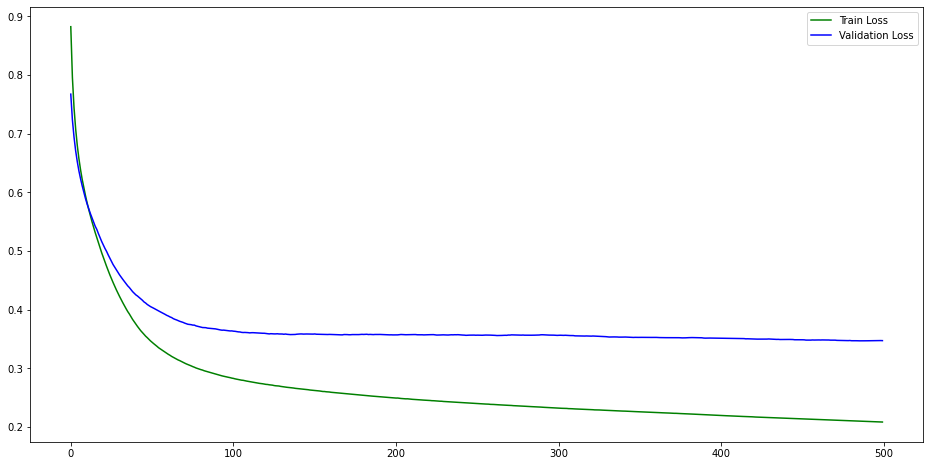

In [73]:
y_pred_class_n4=model_4.predict_classes(X_test_norm)

y_pred_prob_n4=model_4.predict(X_test_norm)
plt.figure(figsize=(16,8))
plt.plot(run_hist_4.history["loss"],'green', label="Train Loss")
plt.plot(run_hist_4.history["val_loss"],'blue', label="Validation Loss")
plt.legend()
plt.show()

accuracy is 0.8487394957983193
roc-auc is 0.9372159090909091


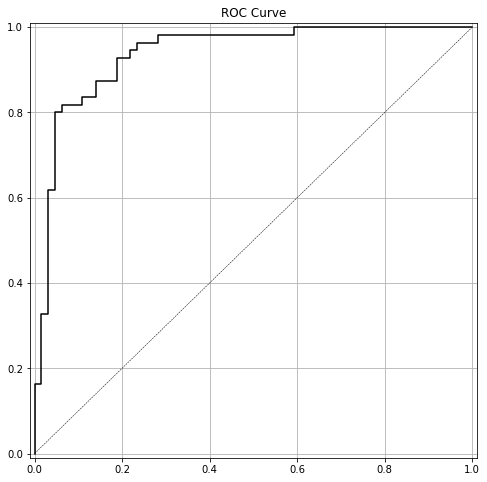

In [74]:
print('accuracy is {}'.format(accuracy_score(y_test,y_pred_class_n4)))
print('roc-auc is {}'.format(roc_auc_score(y_test,y_pred_prob_n4)))
plot_roc(y_test, y_pred_prob_n4, 'DNN_EPOCH_500_adagrad')

Adagrad does a slight lower job in term of accuracy than all of the optimisers we test but we notice that the overfitting even though is higher than SGD but keep its level in a steady fashion without reaching very high levels

We will stop for now switching optimisers as SGD seems doing good probably since we have a small dataset ? we will test out if we benefit from 1000 epochs

In [75]:
model_5=Sequential()

model_5.add(Dense(10,input_shape=(13,), activation='relu'))

model_5.add(Dense(6, activation='relu'))

model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(SGD(lr=0.003),"binary_crossentropy", metrics=["BinaryAccuracy"])

run_hist_5=model_5.fit(X_train_norm,y_train, validation_data=(X_test_norm,y_test), epochs=1000, shuffle=True)

Epoch 1/1000
9/9 [==============================] - 1s 51ms/step - loss: 0.6870 - binary_accuracy: 0.5451 - val_loss: 0.6986 - val_binary_accuracy: 0.4454
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6799 - binary_accuracy: 0.5396 - val_loss: 0.6979 - val_binary_accuracy: 0.4622
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6886 - binary_accuracy: 0.5215 - val_loss: 0.6972 - val_binary_accuracy: 0.4622
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6829 - binary_accuracy: 0.5280 - val_loss: 0.6966 - val_binary_accuracy: 0.4706
Epoch 5/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6836 - binary_accuracy: 0.5338 - val_loss: 0.6960 - val_binary_accuracy: 0.4706
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6812 - binary_accuracy: 0.5313 - val_loss: 0.6954 - val_binary_accuracy: 0.4790
Epoch 7/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6

Epoch 54/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.6498 - binary_accuracy: 0.6797 - val_loss: 0.6685 - val_binary_accuracy: 0.6050
Epoch 55/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.6433 - binary_accuracy: 0.6699 - val_loss: 0.6679 - val_binary_accuracy: 0.6050
Epoch 56/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.6539 - binary_accuracy: 0.6380 - val_loss: 0.6673 - val_binary_accuracy: 0.6050
Epoch 57/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.6385 - binary_accuracy: 0.6916 - val_loss: 0.6666 - val_binary_accuracy: 0.6050
Epoch 58/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.6408 - binary_accuracy: 0.6697 - val_loss: 0.6660 - val_binary_accuracy: 0.5966
Epoch 59/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6389 - binary_accuracy: 0.6927 - val_loss: 0.6654 - val_binary_accuracy: 0.5966
Epoch 60/1000
9/9 [==============================] - 0s 8ms/step - los

Epoch 107/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5926 - binary_accuracy: 0.7657 - val_loss: 0.6258 - val_binary_accuracy: 0.7479
Epoch 108/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5823 - binary_accuracy: 0.7995 - val_loss: 0.6249 - val_binary_accuracy: 0.7479
Epoch 109/1000
9/9 [==============================] - 0s 31ms/step - loss: 0.5765 - binary_accuracy: 0.7790 - val_loss: 0.6239 - val_binary_accuracy: 0.7479
Epoch 110/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5944 - binary_accuracy: 0.7750 - val_loss: 0.6229 - val_binary_accuracy: 0.7647
Epoch 111/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5870 - binary_accuracy: 0.7583 - val_loss: 0.6219 - val_binary_accuracy: 0.7647
Epoch 112/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.5854 - binary_accuracy: 0.7588 - val_loss: 0.6209 - val_binary_accuracy: 0.7731
Epoch 113/1000
9/9 [==============================] - 0s 8ms/st

9/9 [==============================] - 0s 8ms/step - loss: 0.4428 - binary_accuracy: 0.7826 - val_loss: 0.4856 - val_binary_accuracy: 0.7731
Epoch 212/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.4299 - binary_accuracy: 0.8198 - val_loss: 0.4845 - val_binary_accuracy: 0.7731
Epoch 213/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.4217 - binary_accuracy: 0.8188 - val_loss: 0.4833 - val_binary_accuracy: 0.7731
Epoch 214/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.4350 - binary_accuracy: 0.8018 - val_loss: 0.4822 - val_binary_accuracy: 0.7731
Epoch 215/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.4544 - binary_accuracy: 0.7964 - val_loss: 0.4811 - val_binary_accuracy: 0.7731
Epoch 216/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.4605 - binary_accuracy: 0.8221 - val_loss: 0.4799 - val_binary_accuracy: 0.7731
Epoch 217/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.420

9/9 [==============================] - 0s 8ms/step - loss: 0.3854 - binary_accuracy: 0.8353 - val_loss: 0.4076 - val_binary_accuracy: 0.7815
Epoch 316/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3848 - binary_accuracy: 0.8246 - val_loss: 0.4071 - val_binary_accuracy: 0.7815
Epoch 317/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3600 - binary_accuracy: 0.8370 - val_loss: 0.4067 - val_binary_accuracy: 0.7815
Epoch 318/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3626 - binary_accuracy: 0.8568 - val_loss: 0.4062 - val_binary_accuracy: 0.7815
Epoch 319/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3725 - binary_accuracy: 0.8422 - val_loss: 0.4057 - val_binary_accuracy: 0.7815
Epoch 320/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3434 - binary_accuracy: 0.8532 - val_loss: 0.4053 - val_binary_accuracy: 0.7815
Epoch 321/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.368

9/9 [==============================] - 0s 8ms/step - loss: 0.3339 - binary_accuracy: 0.8437 - val_loss: 0.3724 - val_binary_accuracy: 0.7983
Epoch 420/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3090 - binary_accuracy: 0.8484 - val_loss: 0.3722 - val_binary_accuracy: 0.7983
Epoch 421/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2957 - binary_accuracy: 0.8893 - val_loss: 0.3720 - val_binary_accuracy: 0.7983
Epoch 422/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3251 - binary_accuracy: 0.8714 - val_loss: 0.3718 - val_binary_accuracy: 0.7983
Epoch 423/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3082 - binary_accuracy: 0.8690 - val_loss: 0.3716 - val_binary_accuracy: 0.7983
Epoch 424/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3342 - binary_accuracy: 0.8387 - val_loss: 0.3714 - val_binary_accuracy: 0.7983
Epoch 425/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.305

9/9 [==============================] - 0s 8ms/step - loss: 0.3068 - binary_accuracy: 0.8533 - val_loss: 0.3540 - val_binary_accuracy: 0.8235
Epoch 524/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2705 - binary_accuracy: 0.8745 - val_loss: 0.3539 - val_binary_accuracy: 0.8235
Epoch 525/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.3000 - binary_accuracy: 0.8629 - val_loss: 0.3538 - val_binary_accuracy: 0.8235
Epoch 526/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2879 - binary_accuracy: 0.8830 - val_loss: 0.3537 - val_binary_accuracy: 0.8235
Epoch 527/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2902 - binary_accuracy: 0.8766 - val_loss: 0.3536 - val_binary_accuracy: 0.8235
Epoch 528/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2763 - binary_accuracy: 0.8747 - val_loss: 0.3534 - val_binary_accuracy: 0.8235
Epoch 529/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.324

9/9 [==============================] - 0s 8ms/step - loss: 0.2565 - binary_accuracy: 0.8876 - val_loss: 0.3429 - val_binary_accuracy: 0.8235
Epoch 628/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2794 - binary_accuracy: 0.8680 - val_loss: 0.3428 - val_binary_accuracy: 0.8235
Epoch 629/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2317 - binary_accuracy: 0.9090 - val_loss: 0.3427 - val_binary_accuracy: 0.8235
Epoch 630/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2811 - binary_accuracy: 0.8736 - val_loss: 0.3426 - val_binary_accuracy: 0.8235
Epoch 631/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2571 - binary_accuracy: 0.8751 - val_loss: 0.3425 - val_binary_accuracy: 0.8235
Epoch 632/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2739 - binary_accuracy: 0.8706 - val_loss: 0.3424 - val_binary_accuracy: 0.8235
Epoch 633/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.246

9/9 [==============================] - 0s 8ms/step - loss: 0.2289 - binary_accuracy: 0.8987 - val_loss: 0.3358 - val_binary_accuracy: 0.8151
Epoch 732/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2392 - binary_accuracy: 0.8894 - val_loss: 0.3356 - val_binary_accuracy: 0.8151
Epoch 733/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2358 - binary_accuracy: 0.9016 - val_loss: 0.3355 - val_binary_accuracy: 0.8151
Epoch 734/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2624 - binary_accuracy: 0.8740 - val_loss: 0.3356 - val_binary_accuracy: 0.8151
Epoch 735/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2452 - binary_accuracy: 0.8709 - val_loss: 0.3355 - val_binary_accuracy: 0.8151
Epoch 736/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2285 - binary_accuracy: 0.8946 - val_loss: 0.3355 - val_binary_accuracy: 0.8151
Epoch 737/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.246

9/9 [==============================] - 0s 9ms/step - loss: 0.2406 - binary_accuracy: 0.8788 - val_loss: 0.3308 - val_binary_accuracy: 0.8403
Epoch 836/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2356 - binary_accuracy: 0.8726 - val_loss: 0.3308 - val_binary_accuracy: 0.8403
Epoch 837/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2377 - binary_accuracy: 0.8808 - val_loss: 0.3307 - val_binary_accuracy: 0.8403
Epoch 838/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2467 - binary_accuracy: 0.8709 - val_loss: 0.3306 - val_binary_accuracy: 0.8403
Epoch 839/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2120 - binary_accuracy: 0.8913 - val_loss: 0.3306 - val_binary_accuracy: 0.8403
Epoch 840/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2129 - binary_accuracy: 0.8910 - val_loss: 0.3304 - val_binary_accuracy: 0.8403
Epoch 841/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.240

9/9 [==============================] - 0s 8ms/step - loss: 0.1882 - binary_accuracy: 0.9160 - val_loss: 0.3271 - val_binary_accuracy: 0.8487
Epoch 940/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2035 - binary_accuracy: 0.8967 - val_loss: 0.3270 - val_binary_accuracy: 0.8487
Epoch 941/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.1842 - binary_accuracy: 0.9153 - val_loss: 0.3270 - val_binary_accuracy: 0.8487
Epoch 942/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2202 - binary_accuracy: 0.8844 - val_loss: 0.3270 - val_binary_accuracy: 0.8487
Epoch 943/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.1864 - binary_accuracy: 0.9009 - val_loss: 0.3270 - val_binary_accuracy: 0.8487
Epoch 944/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.1961 - binary_accuracy: 0.9126 - val_loss: 0.3270 - val_binary_accuracy: 0.8487
Epoch 945/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.249

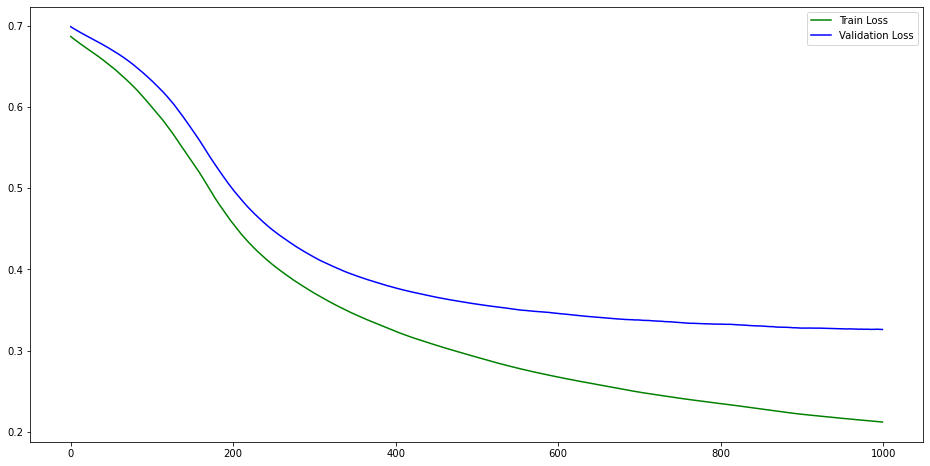

In [78]:
y_pred_class_n5=model_5.predict_classes(X_test_norm)

y_pred_prob_n5=model_5.predict(X_test_norm)
plt.figure(figsize=(16,8))
plt.plot(run_hist_5.history["loss"],'green', label="Train Loss")
plt.plot(run_hist_5.history["val_loss"],'blue', label="Validation Loss")
plt.legend()
plt.show()

accuracy is 0.8487394957983193
roc-auc is 0.9451704545454545


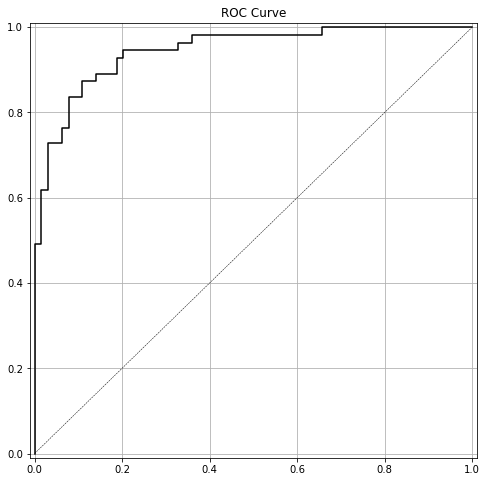

In [79]:
print('accuracy is {}'.format(accuracy_score(y_test,y_pred_class_n5)))
print('roc-auc is {}'.format(roc_auc_score(y_test,y_pred_prob_n5)))
plot_roc(y_test, y_pred_prob_n5, 'DNN_EPOCH_1000_SGD')

We can see that adding more epochs just gave us more overfitting at the end. Even the accuracy and ROC accuracy are both lower.

<H2> KEY INSIGHT AND FURTHER ANALYSIS</H2>

Using DNN is very straight forward with this type of work. The main insight we have have is that using more epochs wont help that much probably since we have a small dataset containing only 13 features ? 

Using SGD is more appropriate in our case

<H2> RECOMMENDATIONS TO WHAT COMES NEXT ?</H2>

More data need to be acquired to test the performance of this SGD model that we choose. 

We can also test out using auto encoders to check if there is any dimentionality reduction we can have in the dataset.
